In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos

In [2]:
names = ['A','Bb','B','C','Db','D','Eb','E','F','Gb','G','Ab']
all_notes = {}
for i in range(120):
    all_notes[names[i%12] + str(i//12)] = (i, round(27.5*2**(i/12),4))
#Anything above A8 is not very musical
# https://www.szynalski.com/tone-generator/
N = {}
for i in range(96):
    N[names[i%12] + str(i//12)] = (i, round(27.5*2**(i/12),4))
# print(N)
Nk = list(N.keys())
# print(Nk)

In [3]:
all_notes

{'A0': (0, 27.5),
 'Bb0': (1, 29.1352),
 'B0': (2, 30.8677),
 'C0': (3, 32.7032),
 'Db0': (4, 34.6478),
 'D0': (5, 36.7081),
 'Eb0': (6, 38.8909),
 'E0': (7, 41.2034),
 'F0': (8, 43.6535),
 'Gb0': (9, 46.2493),
 'G0': (10, 48.9994),
 'Ab0': (11, 51.9131),
 'A1': (12, 55.0),
 'Bb1': (13, 58.2705),
 'B1': (14, 61.7354),
 'C1': (15, 65.4064),
 'Db1': (16, 69.2957),
 'D1': (17, 73.4162),
 'Eb1': (18, 77.7817),
 'E1': (19, 82.4069),
 'F1': (20, 87.3071),
 'Gb1': (21, 92.4986),
 'G1': (22, 97.9989),
 'Ab1': (23, 103.8262),
 'A2': (24, 110.0),
 'Bb2': (25, 116.5409),
 'B2': (26, 123.4708),
 'C2': (27, 130.8128),
 'Db2': (28, 138.5913),
 'D2': (29, 146.8324),
 'Eb2': (30, 155.5635),
 'E2': (31, 164.8138),
 'F2': (32, 174.6141),
 'Gb2': (33, 184.9972),
 'G2': (34, 195.9977),
 'Ab2': (35, 207.6523),
 'A3': (36, 220.0),
 'Bb3': (37, 233.0819),
 'B3': (38, 246.9417),
 'C3': (39, 261.6256),
 'Db3': (40, 277.1826),
 'D3': (41, 293.6648),
 'Eb3': (42, 311.127),
 'E3': (43, 329.6276),
 'F3': (44, 349.

In [4]:
def major(note):
    idx = names.index(note)
    steps = [0, 2, 4, 5, 7, 9, 11, 12]
    return [names[(idx + s)%12] for s in steps]

def natural_minor(note):
    idx = names.index(note)
    steps = [0, 2, 3, 5, 7, 8, 10, 12]
    return [names[(idx + s)%12] for s in steps]

def harmonic_minor(note):
    idx = names.index(note)
    steps = [0, 2, 3, 5, 7, 8, 11, 12]
    return [names[(idx + s)%12] for s in steps]

def major_chord(note):
    m = major_scale(note)
    return (m[0], m[2], m[4])

In [5]:
def gen_sin_wave(f, t, b = 2, s = 44100):
    #f = frequency of wave
    #t = amount of time to generate sample (in milliseconds)
    #s = samples per second
    #b = bytes per sample
    freq = (6.28318530718 * f)/(s)
    arr_len = int(s * (t/1000))
    scale = 2**((b * 8)-1)
    dom = np.arange(0, arr_len * freq, freq)
    return (scale * np.sin(dom)).astype(np.int64)
#     return np.array([int(scale * sin(freq * i)) for i in range(arr_len)])

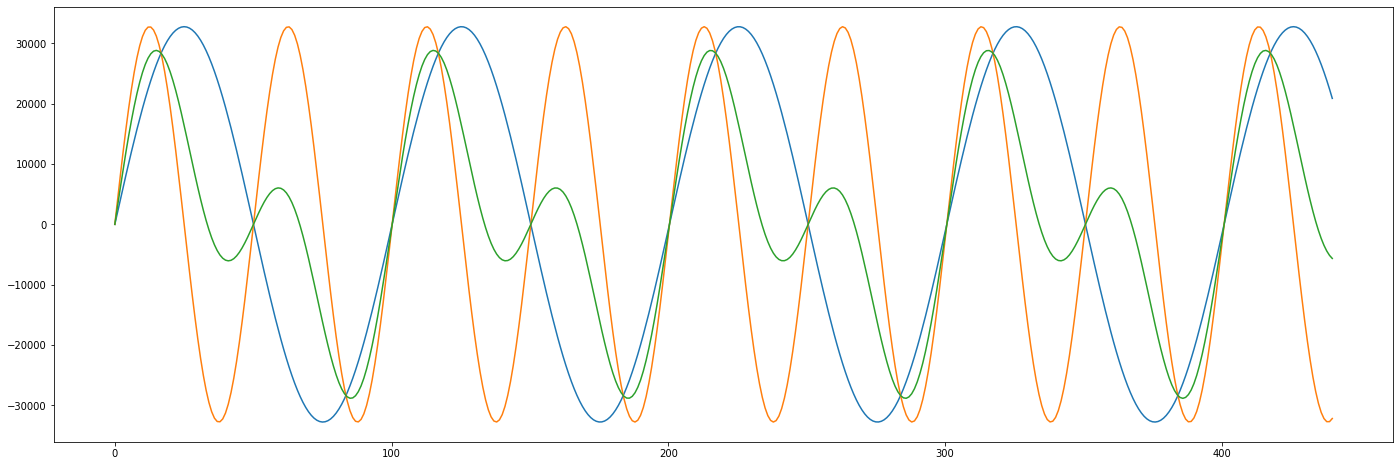

In [6]:
plt.figure(figsize=(24,8))
A4 = gen_sin_wave(N['A4'][1], 10)
plt.plot(A4)
A5 = gen_sin_wave(N['A5'][1], 10)
plt.plot(A5)
octave = (A4 + A5)//2
plt.plot(octave)

1323

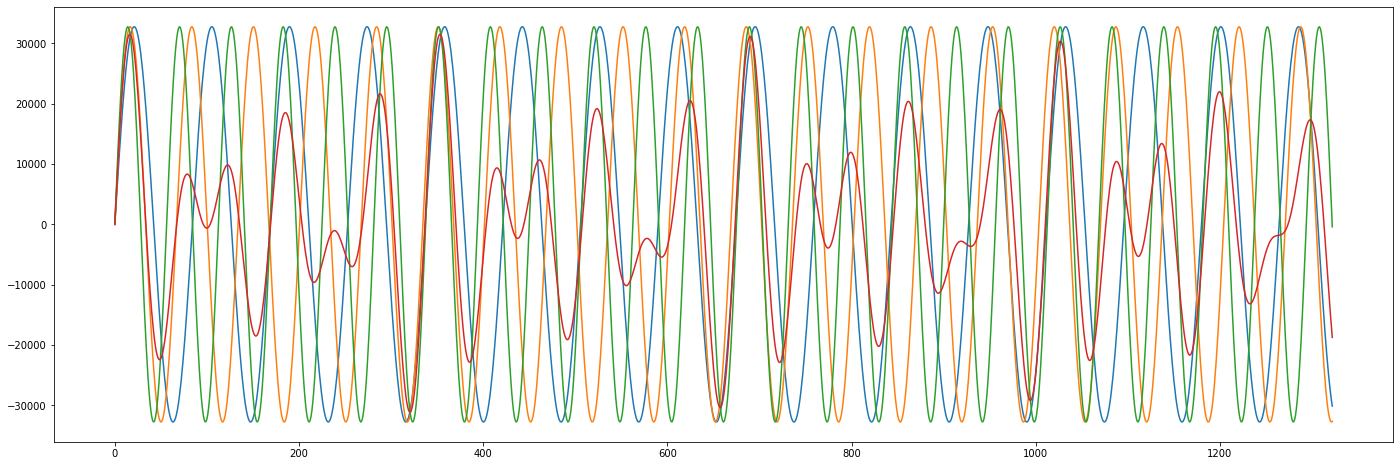

In [7]:
C = gen_sin_wave(N['C4'][1], 30)
E = gen_sin_wave(N['E4'][1], 30)
F = gen_sin_wave(N['F3'][1], 30)
G = gen_sin_wave(N['G4'][1], 30)
maj = (C + (E//2) + G)//2.5
fourth = (C + F)//2
plt.figure(figsize=(24,8))
plt.plot(C)
plt.plot(E)
plt.plot(G)
plt.plot(maj)
len(maj)

In [8]:
def dot_note(note, sample, s_rate=44100):
    l = len(sample)
    ret = 0
    reti = 0
    freq = (6.28318530718 * N[note][1])/s_rate
    for i in range(l):
        ret += sin(i * freq) * sample[i]
        reti += cos(i * freq) * sample[i]
    return (ret**2 + reti**2)

In [9]:
dot_note('G4', maj)

68450319999579.766

In [10]:
ifft = [dot_note(n, maj) for n in list(N.keys())]

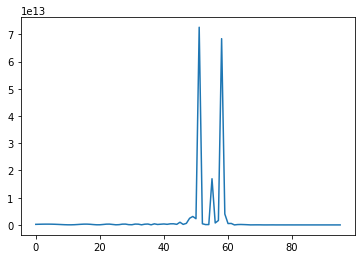

In [11]:
plt.plot(ifft)

In [12]:
maj = (C + E//2 + G)//2.5
maj2 = maj[157:]
maj2 += (np.random.rand(len(maj2)) * 32000).astype(np.int64)
maj2 = maj2.astype(np.int64)
len(maj2)

1166

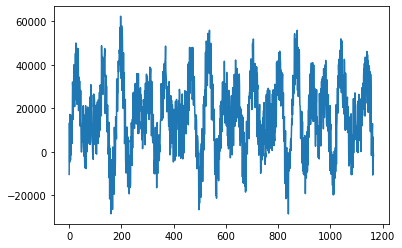

In [13]:
plt.plot(maj2)

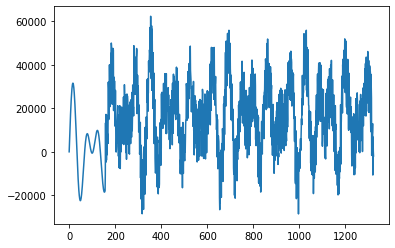

In [14]:
plt.plot(maj)

In [18]:
ifft = [int(dot_note(n, maj2)) for n in list(N.keys())[24:96]]

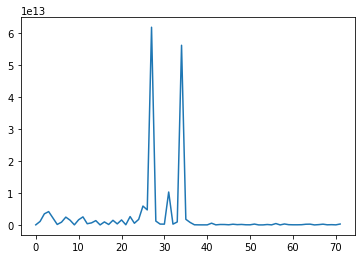

In [19]:
plt.plot(ifft)